# Bibind Vasu
# Assignment 8
# NLP

In [10]:
from IPython.core.display import HTML
style = """
<style>
div.output_area {
overflow-y: scroll;
    max-height: 500px;
}
</style>
"""
HTML(style)

In [11]:

import re, nltk, os
from pandas import DataFrame
import numpy as np

# The components for analysis:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from scipy.cluster.hierarchy import linkage, dendrogram

# The components for viz & pprint
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

# Corpus = The Stories of Tristan Farnon
### http://textfiles.com/stories/
## Tristan Alexander Farnon is an American webcomic author, creator of Leisure Town, the Silent Key podcast and Spigot, a member of webcomic collective Jerkcity.


In [12]:
# Let's load the texts in from the corpus folder we created earlier.
# Let's add a set that contains files we want to ignore (useful if there is a
# license file, a readme, or some metafile you want to ignore)

# Input folder
corpusFolder = "/Users/bibindvasu/Documents/NLP/text_corpus"
ignoreFiles = set([".DS_Store","LICENSE","README.md"])

def lexical_diversity(text):
    return len(set(text)) / len(text)*100
# The vectorizor object wants a list of texts, so we will prepare one for it
sTexts = []
sTitles = []
sTextMeasures = {}
for root, dirs, files in os.walk(corpusFolder):
    for filename in files:
        if filename not in ignoreFiles:
            with open(os.path.join(root,filename),encoding='utf8', errors='replace') as rf:
                my_text = rf.read()
                sTexts.append(my_text)  #.lower()
                sTitles.append(filename[:-4])
                sTextMeasures[filename[:-4]] = [len(my_text),lexical_diversity(my_text)]


# This is where you would then manipulate your corpus if you choose:
# Remove stopwords and/or punctuation, remove common words, lowercase all, etc etc.
                
#shortTitles = for title in sTitles
print(len(sTexts))
pprint(sTitles)
# Here I add a variable tounderstand the measures of the text- length of the text and lexical diversity
pprint(sTextMeasures)

15
['sresei',
 'sre09',
 'sre08',
 'srefinl',
 'sre05',
 'sre04',
 'sre10',
 'sre06',
 'sre07',
 'sre03',
 'sre02',
 'sretrade',
 'srex',
 'srefeqh',
 'sre01']
{'sre01': [11278, 0.6384110657918071],
 'sre02': [5862, 1.1088365745479358],
 'sre03': [8555, 0.853302162478083],
 'sre04': [44198, 0.17874111950767002],
 'sre05': [20773, 0.42844076445385837],
 'sre06': [26731, 0.33668774082525904],
 'sre07': [23597, 0.3432639742340128],
 'sre08': [33170, 0.24419656315948146],
 'sre09': [26073, 0.3029954358915353],
 'sre10': [25725, 0.30320699708454807],
 'srefeqh': [20054, 0.3889498354443004],
 'srefinl': [33158, 0.25333252910308224],
 'sresei': [20753, 0.39994217703464563],
 'sretrade': [9008, 0.8436944937833037],
 'srex': [37128, 0.2127774186597716]}


# 1a An HCA dendrogram including similarity scores for your corpus

In [13]:
# Get the frequencies of the most common ngrams in the corpus 
countVectorizer = TfidfVectorizer(max_features=999, use_idf=False) # Paul limits this to 1000 ngrams, worth playing with
countMatrix = countVectorizer.fit_transform(sTexts)
print(countVectorizer.get_feature_names()[:1000])
print(countMatrix.shape)
print(countMatrix)
#help(TfidfVectorizer)

['10', '11', '12', '13', '14', '___', '____', '_____', '______', '_______', '________', '____________', '_____________', 'able', 'about', 'across', 'action', 'activate', 'activated', 'activity', 'actually', 'admiral', 'admirals', 'admiralty', 'advantage', 'afraid', 'after', 'again', 'against', 'ago', 'ahead', 'aid', 'alert', 'alien', 'alive', 'all', 'alliance', 'allow', 'allowed', 'almost', 'along', 'alot', 'already', 'alrus', 'also', 'although', 'always', 'am', 'amina', 'amoko', 'an', 'and', 'another', 'answer', 'antiox', 'any', 'anymore', 'anyone', 'anything', 'anyway', 'apart', 'appeared', 'are', 'armada', 'armed', 'army', 'around', 'arrived', 'as', 'asked', 'asteroid', 'at', 'attack', 'attacked', 'attacking', 'attacks', 'audcom', 'award', 'away', 'aytori', 'back', 'bad', 'base', 'based', 'battle', 'be', 'beam', 'beams', 'became', 'because', 'become', 'becuase', 'been', 'before', 'began', 'begin', 'beginning', 'behind', 'being', 'believe', 'best', 'better', 'between', 'big', 'billio

In [14]:
# We can measure the distances between all of these documents using a variety of metrics.
# There are many assumptions these distance metrics make (and some might be better than others).
similarity = euclidean_distances(countMatrix)
print(similarity)
print(similarity.shape)

[[0.         0.6597496  0.63987254 0.69915073 0.57234502 0.55526532
  0.64994152 0.66194606 0.64422361 0.6799533  0.74742854 0.88175329
  0.667821   0.70932224 0.70864865]
 [0.6597496  0.         0.24816464 0.3354939  0.44298428 0.54828019
  0.45670673 0.36875174 0.32961723 0.62320525 0.5804624  0.69658236
  0.33046014 0.39568674 0.59624634]
 [0.63987254 0.24816464 0.         0.35041057 0.40743338 0.52267403
  0.45056631 0.350401   0.31001065 0.62547136 0.56553287 0.72031226
  0.32800679 0.39826098 0.57959557]
 [0.69915073 0.3354939  0.35041057 0.         0.45991299 0.57097582
  0.43228624 0.35005966 0.37074933 0.62606626 0.56403243 0.65662578
  0.29984421 0.34555272 0.58322526]
 [0.57234502 0.44298428 0.40743338 0.45991299 0.         0.39747309
  0.49642305 0.32296575 0.421682   0.61001176 0.54970683 0.76847552
  0.45693827 0.48277771 0.53705654]
 [0.55526532 0.54828019 0.52267403 0.57097582 0.39747309 0.
  0.5626591  0.49611231 0.54227347 0.53869571 0.62118039 0.82292571
  0.56830905

In [15]:
# We can group these documents together based on which ones are closest 
# together using Hierarchical Cluster Analysis. Here we use the "Ward" algorithm.
# 
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for
# documentation of other HCA models, e.g. 'single', 'complete', 'weighted', and 'median'.
linkages = linkage(similarity,'ward')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


In [16]:
linkages

array([[ 1.        ,  2.        ,  0.35713922,  2.        ],
       [ 3.        , 12.        ,  0.43133982,  2.        ],
       [ 8.        , 15.        ,  0.49223909,  3.        ],
       [13.        , 16.        ,  0.51599016,  3.        ],
       [ 4.        ,  7.        ,  0.5237675 ,  2.        ],
       [17.        , 18.        ,  0.6786525 ,  6.        ],
       [ 9.        , 14.        ,  0.71896313,  2.        ],
       [ 6.        , 20.        ,  0.77846603,  7.        ],
       [ 5.        , 21.        ,  0.80460258,  3.        ],
       [19.        , 22.        ,  0.83970315,  9.        ],
       [10.        , 23.        ,  0.86688175,  4.        ],
       [ 0.        , 25.        ,  1.15950906,  5.        ],
       [11.        , 26.        ,  1.50810188,  6.        ],
       [24.        , 27.        ,  2.22821354, 15.        ]])

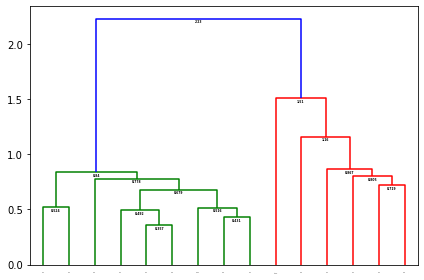

In [17]:
f = plt.figure()

# Here we will use scipy's dendogram function (which we imported) to plot this:
dendr = dendrogram(linkages, labels=sTitles, leaf_font_size=1) #orientation="right",


# We'll adjust the plot a bit to make it better
plt.tick_params(axis='x', which='both')  #, bottom=False, top=False, labelbottom=False)

# This will prevent the labels from going off the figure
plt.tight_layout()

for i, d in zip(dendr['icoord'], dendr['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y) #, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -1),
                         textcoords='offset points',
                         va='top', ha='center', fontsize=3, fontweight='bold')

plt.show()

f.savefig("dendrogram.pdf", bbox_inches='tight')


# 1b  An HCA “clustermap” heatmap with dendrograms, based on the same model.

//anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


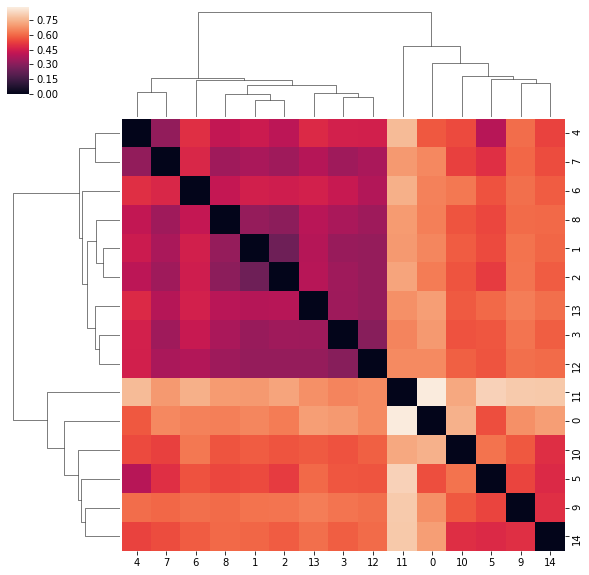

In [18]:
# Finally, let's visualize our raw similarity matrices as a clustermap (heatmap) + dendograms on the axes
g = sns.clustermap(similarity, method='ward') #, metric='correlation')
g.savefig("clustermap.pdf", bbox_inches='tight')
#document 37 is The Pheonix and the Turtle - not very similar to everything else, but it is "correctly" clustered
#with the other long poems

# 1c An HCA dendrogram and clustermap for your model with all words lowercased,lemmatized, and stopwords and punctuation removed.

In [19]:
import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from string import punctuation
from autocorrect import spell

snowball_stemmer = SnowballStemmer('english')
wordnet_lemmatizer = WordNetLemmatizer()

# Preprocessing the text

def pre_process(text):
    s_text = ''.join([str(elem) for elem in text]) 
    lower_text = s_text.lower()
    sent_list = []
    stop_words = stopwords.words('english')
    for w in nltk.sent_tokenize(lower_text):
        sent_list.append(w)
    #print(sent_list[:50])
    
    word_list = []
    for each_sent in sent_list:
        lemmatized_word = [wordnet_lemmatizer.lemmatize(word)for word in nltk.sent_tokenize(each_sent) ]
        lemmatizzed_sent = "".join(lemmatized_word)
        clean_text = ''.join([c for c in lemmatizzed_sent if not c.isdigit()])
        clean_text = ''.join([c for c in clean_text if c not in punctuation])
        clean_text = ' '.join([w for w in nltk.word_tokenize(clean_text) if not w in stop_words])
        word_tokens =  [sent for sent in nltk.sent_tokenize(clean_text)]
        for i in word_tokens:
            word_list.append(i)
    return word_list
clean_sTexts = []
for item in sTexts:
    my_text = pre_process(item)
    m_text = ''.join([str(elem) for elem in my_text]) 
    clean_sTexts.append(m_text)

In [20]:
# Get the frequencies of the most common ngrams in the corpus 
countVectorizer = TfidfVectorizer(max_features=999, use_idf=False) # Paul limits this to 1000 ngrams, worth playing with
countMatrix = countVectorizer.fit_transform(clean_sTexts)
print(countVectorizer.get_feature_names()[:1000])
print(countMatrix.shape)
print(countMatrix)
#help(TfidfVectorizer)

['able', 'across', 'action', 'activate', 'activated', 'activity', 'actually', 'admiral', 'admirals', 'admiralty', 'advantage', 'afraid', 'agents', 'ago', 'aid', 'alert', 'alien', 'alive', 'alliance', 'alliances', 'allow', 'allowed', 'almost', 'along', 'alot', 'already', 'alrus', 'also', 'always', 'amoko', 'amokos', 'another', 'antiox', 'anyone', 'anything', 'apart', 'appeared', 'armada', 'armed', 'army', 'around', 'arrived', 'asked', 'assassins', 'assured', 'asteroid', 'attack', 'attacked', 'attacking', 'attacks', 'attempted', 'audcom', 'award', 'away', 'aytori', 'back', 'bad', 'base', 'based', 'battle', 'beam', 'beams', 'became', 'become', 'becoming', 'becuase', 'began', 'begin', 'beginning', 'begun', 'behind', 'believe', 'best', 'better', 'beyond', 'big', 'bil', 'billion', 'biological', 'bioweapons', 'black', 'blakta', 'blaktas', 'blaster', 'boarded', 'bomb', 'border', 'bounty', 'bountyhunter', 'brain', 'brief', 'briefing', 'brilliant', 'bring', 'broken', 'bronco', 'broncobuster', 'b

In [21]:
# We can measure the distances between all of these documents using a variety of metrics.
# There are many assumptions these distance metrics make (and some might be better than others).
similarity = euclidean_distances(countMatrix)
print(similarity)
print(similarity.shape)

[[0.         1.16583443 1.17648505 1.20603212 1.04982287 1.09271312
  1.24049161 1.10869771 1.18695379 1.19813778 1.28207502 1.29921057
  1.16870314 1.18862606 1.25403175]
 [1.16583443 0.         0.67844247 0.92849208 1.1155121  1.19638904
  1.02773746 1.04409305 0.85891593 1.24360026 1.31311017 1.33078988
  0.89584569 1.04800658 1.30266178]
 [1.17648505 0.67844247 0.         0.95822661 1.11077191 1.18389458
  1.05096392 1.04913027 0.81798236 1.247566   1.32655871 1.30970919
  0.91186642 1.08630684 1.30200181]
 [1.20603212 0.92849208 0.95822661 0.         1.15752851 1.22364093
  0.96788097 1.12195945 0.99096184 1.25082528 1.32601052 1.32571939
  0.8731743  1.01912796 1.27573636]
 [1.04982287 1.1155121  1.11077191 1.15752851 0.         0.90845187
  1.15400137 0.84663164 1.07588753 1.14768418 1.18840491 1.27452199
  1.10456349 1.12002426 1.1700206 ]
 [1.09271312 1.19638904 1.18389458 1.22364093 0.90845187 0.
  1.22061591 1.02981164 1.17472966 1.04235787 1.18634733 1.28339682
  1.18124394

In [22]:
# We can group these documents together based on which ones are closest 
# together using Hierarchical Cluster Analysis. Here we use the "Ward" algorithm.
# 
# See https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html for
# documentation of other HCA models, e.g. 'single', 'complete', 'weighted', and 'median'.
linkages = linkage(similarity,'ward')

//anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  


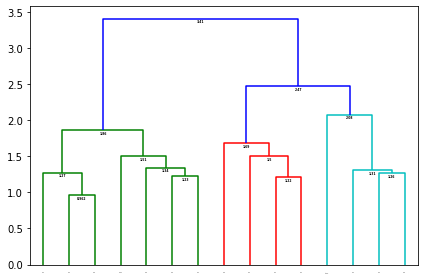

In [23]:
f = plt.figure()

# Here we will use scipy's dendogram function (which we imported) to plot this:
dendr = dendrogram(linkages, labels=sTitles, leaf_font_size=1) #orientation="right",


# We'll adjust the plot a bit to make it better
plt.tick_params(axis='x', which='both')  #, bottom=False, top=False, labelbottom=False)

# This will prevent the labels from going off the figure
plt.tight_layout()

for i, d in zip(dendr['icoord'], dendr['dcoord']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            plt.plot(x, y) #, 'ro')
            plt.annotate("%.3g" % y, (x, y), xytext=(0, -1),
                         textcoords='offset points',
                         va='top', ha='center', fontsize=3, fontweight='bold')

plt.show()

f.savefig("dendrogram_clean.pdf", bbox_inches='tight')

//anaconda3/lib/python3.7/site-packages/seaborn/matrix.py:603: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  metric=self.metric)


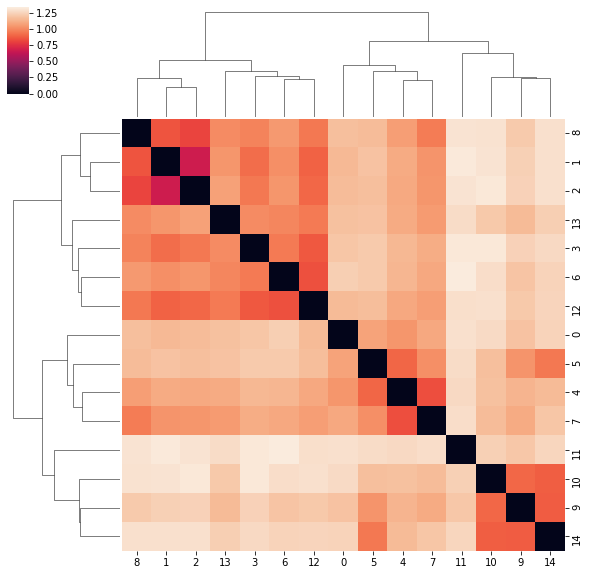

In [24]:
# Finally, let's visualize our raw similarity matrices as a clustermap (heatmap) + dendograms on the axes
g = sns.clustermap(similarity, method='ward') #, metric='correlation')
g.savefig("clustermap_clean.pdf", bbox_inches='tight')
#document 37 is The Pheonix and the Turtle - not very similar to everything else, but it is "correctly" clustered
#with the other long poems

# 1 d In 3-5 sentences, comment on the HCA dendrograms, specifically whether or not youfeel they accurately reflect similarities and dissimilarities among the parts of yourcorpus, and on the differences between the raw model and the model in 1C.

## Answer I believe the dendrogram and the heat map reflect similarities and dissimilaries more or less accurately.
## I had evaluated 15 documents of an Author whom Ihave not read. However I tried to find out few measures of the documents
which may explain the differences.  The length of the document and the lexical diversity scores of the documents are given
below

{'sre01': [11278, 0.6384110657918071],
 'sre02': [5862, 1.1088365745479358],
 'sre03': [8555, 0.853302162478083],
 'sre04': [44198, 0.17874111950767002],
 'sre05': [20773, 0.42844076445385837],
 'sre06': [26731, 0.33668774082525904],
 'sre07': [23597, 0.3432639742340128],
 'sre08': [33170, 0.24419656315948146],
 'sre09': [26073, 0.3029954358915353],
 'sre10': [25725, 0.30320699708454807],
 'srefeqh': [20054, 0.3889498354443004],
 'srefinl': [33158, 0.25333252910308224],
 'sresei': [20753, 0.39994217703464563],
 'sretrade': [9008, 0.8436944937833037],
 'srex': [37128, 0.2127774186597716]}

I believe sre02,sre03,sre05 are markedly distinct from others. sre02 and sre03 are short texts with high lexical diversity scores. sre04 is a long text with low lexical diversity scores.

From the dendrogram sre02 and sre03 form a cluster together. 

After preprocessing the documents, there is a marked differences in the shaeds in the heat map which reflects less correlation when the stop words are removed, punctuations are removed and lemmatized. An understanding of the writing style of the author would be required to comment further.

# QUESTION 2
## 2a Please provide: a. A PCA scatterplot for your corpus.

In [25]:
import re, os, sys, platform, json
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager
import matplotlib.colors

In [26]:
# Size of n-grams:
ngrams = 1

# Limit the number of words to look at
commonWords = 100

# Set the vocabulary you are interested in
limitVocab = False

# Vocabulary file
limitVocabularyFile = "vocab.txt"

In [27]:
# Types of labels for documents in the corpus
#labelTypes = ('author', 'title', 'section', 'genre') # tuple with strings
labelTypes = ('author',)
# Index of label used to set Color:
colorValue = 0 # Index of label to use for color (integer). Here 1 points to "_h/c/t/x"

# Index of label to use for plot labels (if points are labeled)
labelValue = 0 # Index of label to use for labels (integer). Here 0 points to "title"

# Point size (integer)
pointSize = 5 #8

# Show point labels (add labels for each text):
pointLabels = True # True or False

# Plot loadings (write the characters tot he plot)
plotLoadings = True # True or False

# Hide points (useful for seeing loadings better):
hidePoints = False # True or False

# Output file info (dimensions are in inches (width, height)):
outputDimensions = (10, 7.5) # Tuple of integers or floats

# Output file extension determines output type. Save as a pdf if you want to edit in illustator
# PDF Output on mac is very large, but just opening and saving a copy in illustrator will fix this
outputFile = "WS_PCA.pdf" #"myfigure.png"

In [28]:

# NLTK Stop words
from nltk.corpus import stopwords
removeitems = stopwords.words('english')
with open('remove.txt', 'w') as f:
    for item in removeitems:
        f.write("%s\n" % item)

In [29]:


# How many components?
pcaComponents = 2         # Only useful for digging even deeper in the data

# Input folder
corpusFolder = "/Users/bibindvasu/Documents/NLP/text_corpus"

# Items to remove from consideration:
removeItemsFile = "/Users/bibindvasu/Documents/NLP/remove.txt"

In [30]:
####################
# Type Enforcement #
####################

# This section enforces the input values for all the adjustable variables. This
# is to make sure the script isn't run incorrectly.

# function to check values
def valueChecker(varname, typeofobj, value):
    if type(typeofobj) == type:
        if typeofobj == bool and type(value) != typeofobj:
            print(f"{varname} must be a {typeofobj} (True or False). Please fix to run script.")
            sys.exit()
        if type(value) != typeofobj:
            print(f"{varname} must be {typeofobj}. Please fix to run script.")
            sys.exec_info()
            sys.exit() 
    elif type(typeofobj) == tuple:
        if type(value) != typeofobj[0] and type(value) != typeofobj[1]:
            print(f"{varname} must be {typeofobj[0]} or {typeofobj[1]}. Please fix to run script.")
            sys.exit() 

# check values
valueChecker('ngrams', int, ngrams)
valueChecker('commonWords', (int, None), commonWords)
valueChecker('limitVocab', bool, limitVocab)
valueChecker('colorValue', int, colorValue)
valueChecker('labelValue', int, labelValue)
valueChecker('pointSize', int, pointSize)
valueChecker('pointLabels', bool, pointLabels)
valueChecker('plotLoadings', bool, plotLoadings)
valueChecker('hidePoints', bool, hidePoints)
valueChecker('outputFile', str, outputFile)
valueChecker('pcaComponents', int, pcaComponents)
valueChecker('corpusFolder', str, corpusFolder)
valueChecker('removeItemsFile', str, removeItemsFile)

# check tuples and internal values
if type(labelTypes) != tuple:
    print('labelTypes must be a tuple. Please fix to run script.')
    sys.exit()
else:
    for lab in labelTypes:
        valueChecker('labelType item', str, lab)

if type(outputDimensions) != tuple:
    print(f"outputDimensions must be {tuple}. Please fix to run the script")
else:
    for d in outputDimensions:
        valueChecker("outerDimension value", (float, int), d)

# Load in external files
try:
    removeItems = []
    with open(removeItemsFile, "r", encoding='utf8') as rf:
        removeItems = [item.strip() for item in rf.read().split("\n") if item != ""]
except FileNotFoundError:
    print(f"No file named {removeItemsFile} found. Please check filename or create the file.")
    sys.exit()

if limitVocab == True:
    valueChecker('limitVocabularyFile', str, limitVocabularyFile)
    try:
        limitVocabulary = [] 
        with open(limitVocabularyFile, "r", encoding='utf8') as rf:
            limitVocabulary = [item.strip() for item in rf.read().split("\n") if item != ""]
        if commonWords:
            print(f"You are limiting analysis to the {commonWords} most common words but also using a set vocabulary.")
            print("If you want to avoid unexpected behavior, set commonWords to None when limiting vocab.")
    except FileNotFoundError:
        print(f"No file named {limitVocabularyFile} found. Please check filename or create the file")
        print("Defaulting to no limit on the vocabulary")       
        limitVocabulary = None
else:
    limitVocabulary = None

# Ensure corpus folder exists
if not os.path.isdir(corpusFolder):
    print(f"Could not find the corpus folder '{corpusFolder}'. Please double check.")
    sys.exit()


########################
# Function definitions #
########################

# Function to clean the text. Remove desired characters and white space.
def clean(text_f, removeitems):
    text =[]
    words = text_f.split()
    for r in words:
        if not r in removeitems:
            text.append(r)
    text  = ' '.join([str(elem) for elem in text]) 
    text = re.sub("\s+", " ", text)
    return text

##############
# Load Texts #
##############

print("Loading, cleaning, and tokenizing")
# Go through each document in the corpus folder and save info to lists
texts = []
labels = []

for root, dirs, files in os.walk(corpusFolder):
    for i, f in enumerate(files):
        if f not in {'.DS_Store'}:
            # add the labels to the label list
            labels.append(f[:-4].split("_"))

            # Open the text, clean it, and tokenize it
            with open(os.path.join(root,f),"r", encoding='utf8', errors='ignore') as rf:
                #print(rf.read())
                texts.append(clean(rf.read(), removeItems))
            
            if i == len(files) - 1:
                print(f"\r{i+1} of {len(files)} processed", end='\n', flush=True)
            else:
                print(f"\r{i+1} of {len(files)} processed", end='', flush=True)

####################
# Perform Analysis #
####################

print("Vectorizing")
countVectorizer = TfidfVectorizer(max_features=commonWords, use_idf=False, vocabulary=limitVocabulary,  ngram_range=(ngrams, ngrams))
countMatrix = countVectorizer.fit_transform(texts)
print("Normalizing values")
countMatrix = normalize(countMatrix)
countMatrix = countMatrix.toarray()

print("Performing PCA")
# Let's perform PCA on the countMatrix:
pca = PCA(n_components=pcaComponents)
myPCA = pca.fit_transform(countMatrix)




Loading, cleaning, and tokenizing
15 of 15 processed
Vectorizing
Normalizing values
Performing PCA


In [31]:
myPCA

array([[ 0.0590343 ,  0.51314979],
       [-0.40598902, -0.03963124],
       [-0.41093698, -0.00649179],
       [-0.34039553, -0.12547304],
       [ 0.04537935,  0.43662918],
       [ 0.29620741,  0.34024897],
       [-0.17785851, -0.2957299 ],
       [-0.10725922,  0.20140526],
       [-0.37853016, -0.02755245],
       [ 0.54344523, -0.2006299 ],
       [ 0.60294833, -0.20759116],
       [ 0.26550471, -0.01532497],
       [-0.37344719, -0.16005379],
       [-0.19043978, -0.21114973],
       [ 0.57233706, -0.20180523]])

# 2a A PCA scatterplot for your corpus.

Setting plot info
Plotting texts
Adding Labels


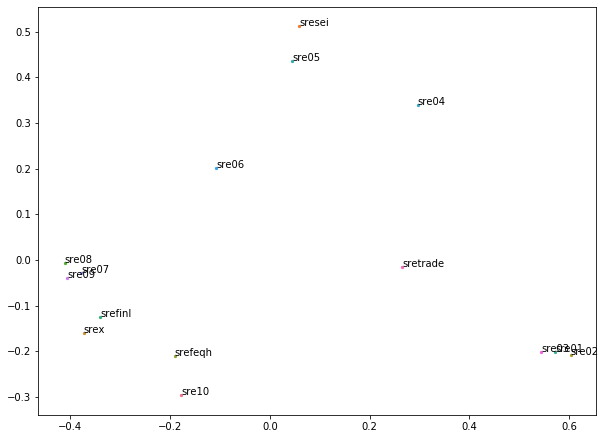

In [32]:
##############
# Plot Setup #
##############

print("Setting plot info")
# set the plot size
plt.figure(figsize=outputDimensions)

# find all the unique values for each of the label types
uniqueLabelValues = [set() for i in range(len(labelTypes))]

for labelList in labels:
    for i, label in enumerate(labelList):
        uniqueLabelValues[i].add(label)


# create color dictionaries for all labels
colorDictionaries = []
for uniqueLabels in uniqueLabelValues:
    colorpalette = sns.color_palette("husl",len(uniqueLabels)).as_hex()
    colorDictionaries.append(dict(zip(uniqueLabels,colorpalette)))
# Now we need the Unique Labels
uniqueColorLabels = list(uniqueLabelValues[colorValue])

# Let's get a number for each class
numberForClass = [i for i in range(len(uniqueColorLabels))]


# Make a dictionary! This is new sytax for us! It just makes a dictionary where
# the keys are the unique years and the values are found in numberForClass
labelForClassNumber = dict(zip(uniqueColorLabels,numberForClass))


# Let's make a new representation for each document that is just these integers
# and it needs to be a numpy array
textClass = np.array([labelForClassNumber[lab[colorValue]] for lab in labels])

# Make a list of the colors
colors = [colorDictionaries[colorValue][lab] for lab in uniqueColorLabels]

if hidePoints:
    pointSize = 0
###################
# Create the plot #
###################

print("Plotting texts")
for col, classNumber, lab in zip(colors, numberForClass, uniqueColorLabels):
    plt.scatter(myPCA[textClass==classNumber,0],myPCA[textClass==classNumber,1],label=lab,c=col, s=pointSize)


# Let's label individual points so we know WHICH document they are
if pointLabels:
    print("Adding Labels")
    for lab, datapoint in zip(labels, myPCA):
        plt.annotate(str(lab[labelValue]),xy=datapoint)


# 2b A PCA scatterplot representing the vocabulary in your plot

Setting plot info
Plotting texts
Adding Labels
[[-1.32538977e-01 -1.18337472e-02 -2.34405191e-02  5.23149827e-01
  -1.19792481e-01  3.41087515e-02 -1.43416476e-01 -8.22267138e-02
   7.60690971e-02 -1.64127108e-02 -4.19224320e-02 -7.53203225e-03
   8.08462172e-02  1.54756911e-03 -2.61632064e-02 -9.37058519e-02
   2.01685542e-02  1.45788691e-02 -1.32858307e-01  1.84824978e-01
  -1.49728803e-02  1.27836321e-01 -7.79646841e-02  8.96049424e-02
   1.97464919e-01  5.68644057e-02 -6.68662237e-02 -1.67157832e-02
  -8.53017704e-02 -8.12495148e-02 -6.34172443e-02  2.23778655e-02
  -3.51273107e-02 -5.14714859e-03 -6.67384212e-02  3.14056187e-02
  -8.30278930e-02 -4.92041692e-03 -2.04035481e-02  7.97969952e-02
   3.85104297e-03  1.17905538e-02  3.14511032e-03 -5.45471782e-02
  -1.06937686e-01 -2.29993385e-01 -6.53334196e-03 -5.37210648e-02
  -1.65398610e-01 -1.69164306e-02 -2.28699789e-02  8.73847453e-02
   1.31729852e-01 -9.13320897e-03 -8.63586847e-02  3.09378976e-02
  -2.55158422e-02 -2.66725385

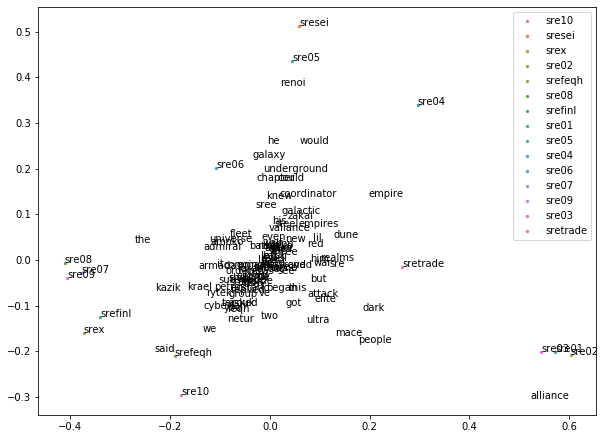

In [33]:
##############
# Plot Setup #
##############

print("Setting plot info")
# set the plot size
plt.figure(figsize=outputDimensions)

# find all the unique values for each of the label types
uniqueLabelValues = [set() for i in range(len(labelTypes))]

for labelList in labels:
    for i, label in enumerate(labelList):
        uniqueLabelValues[i].add(label)


# create color dictionaries for all labels
colorDictionaries = []
for uniqueLabels in uniqueLabelValues:
    colorpalette = sns.color_palette("husl",len(uniqueLabels)).as_hex()
    colorDictionaries.append(dict(zip(uniqueLabels,colorpalette)))
# Now we need the Unique Labels
uniqueColorLabels = list(uniqueLabelValues[colorValue])

# Let's get a number for each class
numberForClass = [i for i in range(len(uniqueColorLabels))]


# Make a dictionary! This is new sytax for us! It just makes a dictionary where
# the keys are the unique years and the values are found in numberForClass
labelForClassNumber = dict(zip(uniqueColorLabels,numberForClass))


# Let's make a new representation for each document that is just these integers
# and it needs to be a numpy array
textClass = np.array([labelForClassNumber[lab[colorValue]] for lab in labels])

# Make a list of the colors
colors = [colorDictionaries[colorValue][lab] for lab in uniqueColorLabels]

if hidePoints:
    pointSize = 0
###################
# Create the plot #
###################

print("Plotting texts")
for col, classNumber, lab in zip(colors, numberForClass, uniqueColorLabels):
    plt.scatter(myPCA[textClass==classNumber,0],myPCA[textClass==classNumber,1],label=lab,c=col, s=pointSize)


# Let's label individual points so we know WHICH document they are
if pointLabels:
    print("Adding Labels")
    for lab, datapoint in zip(labels, myPCA):
        plt.annotate(str(lab[labelValue]),xy=datapoint)


# Let's graph component loadings
vocabulary = countVectorizer.get_feature_names()


loadings = pca.components_
print(loadings)
if plotLoadings:
    print("Rendering Loadings")    
    for i, word in enumerate(vocabulary):
        plt.annotate(word, xy=(loadings[0, i], loadings[1,i]))

# Let's add a legend! matplotlib will make this for us based on the data we 
# gave the scatter function.
plt.legend()
plt.savefig(outputFile)

############################################
# Output data for JavaScript Visualization #
############################################

data = []
for datapoint in myPCA:
    pcDict = {}
    for i, dp in enumerate(datapoint):
        pcDict[f"PC{str(i + 1)}"] = dp
    data.append(pcDict)

jsLoadings = []
for i, word in enumerate(vocabulary):
    temploading = {}
    for j,dp in enumerate(loadings):
        temploading[f"PC{str(j+1)}"] = dp[i]
    jsLoadings.append([word, temploading])

colorDictionaryList = []
for cd in colorDictionaries:
    cdlist = [v for v in cd.values()]
    colorDictionaryList.append(cdlist)

colorstrings = json.dumps(colorDictionaryList)
labelstrings = json.dumps(labels)
valuetypes = json.dumps([k for k in data[0].keys()])
datastrings = json.dumps(data)

limitedlabeltypes = []
for i, t in enumerate(labelTypes):
    if len(uniqueLabelValues[i]) <= 20:
        limitedlabeltypes.append(t)

cattypestrings = json.dumps(limitedlabeltypes)
loadingstrings = json.dumps(jsLoadings)
stringlist = [f"var colorDictionaries = {colorstrings};", f"var labels = {labelstrings};",
            f"var data = {datastrings};", f"var categoryTypes = {list(labelTypes)};", 
            f"var loadings = {jsLoadings};", f"var valueTypes = {valuetypes};",
            f"var limitedCategories = {limitedlabeltypes};",
            f"var activecatnum = {colorValue};", f"var activelabelnum = {labelValue};"]


with open("data.js", "w", encoding="utf8") as wf:
    wf.write("\n".join(stringlist))



# Show the plot
plt.show()


# 2c A PCA scatterplot for your corpus with all words lowercased, lemmatized, and stopwords and punctuation removed.

In [34]:
# Size of n-grams:
ngrams = 1

# Limit the number of words to look at
commonWords = 100

# Set the vocabulary you are interested in
limitVocab = False

# Vocabulary file
limitVocabularyFile = "vocab.txt"

In [35]:
# Types of labels for documents in the corpus
#labelTypes = ('author', 'title', 'section', 'genre') # tuple with strings
labelTypes = ('author',)
# Index of label used to set Color:
colorValue = 0 # Index of label to use for color (integer). Here 1 points to "_h/c/t/x"

# Index of label to use for plot labels (if points are labeled)
labelValue = 0 # Index of label to use for labels (integer). Here 0 points to "title"

# Point size (integer)
pointSize = 5 #8

# Show point labels (add labels for each text):
pointLabels = True # True or False

# Plot loadings (write the characters tot he plot)
plotLoadings = True # True or False

# Hide points (useful for seeing loadings better):
hidePoints = False # True or False

# Output file info (dimensions are in inches (width, height)):
outputDimensions = (10, 7.5) # Tuple of integers or floats

# Output file extension determines output type. Save as a pdf if you want to edit in illustator
# PDF Output on mac is very large, but just opening and saving a copy in illustrator will fix this
outputFile = "WS_PCA1.pdf" #"myfigure.png"

In [36]:


# How many components?
pcaComponents = 2         # Only useful for digging even deeper in the data

# Input folder
corpusFolder = "/Users/bibindvasu/Documents/NLP/text_corpus"

# Items to remove from consideration:
removeItemsFile = "/Users/bibindvasu/Documents/NLP/remove.txt"

In [37]:
####################
# Type Enforcement #
####################

# This section enforces the input values for all the adjustable variables. This
# is to make sure the script isn't run incorrectly.

# function to check values
def valueChecker(varname, typeofobj, value):
    if type(typeofobj) == type:
        if typeofobj == bool and type(value) != typeofobj:
            print(f"{varname} must be a {typeofobj} (True or False). Please fix to run script.")
            sys.exit()
        if type(value) != typeofobj:
            print(f"{varname} must be {typeofobj}. Please fix to run script.")
            sys.exec_info()
            sys.exit() 
    elif type(typeofobj) == tuple:
        if type(value) != typeofobj[0] and type(value) != typeofobj[1]:
            print(f"{varname} must be {typeofobj[0]} or {typeofobj[1]}. Please fix to run script.")
            sys.exit() 

# check values
valueChecker('ngrams', int, ngrams)
valueChecker('commonWords', (int, None), commonWords)
valueChecker('limitVocab', bool, limitVocab)
valueChecker('colorValue', int, colorValue)
valueChecker('labelValue', int, labelValue)
valueChecker('pointSize', int, pointSize)
valueChecker('pointLabels', bool, pointLabels)
valueChecker('plotLoadings', bool, plotLoadings)
valueChecker('hidePoints', bool, hidePoints)
valueChecker('outputFile', str, outputFile)
valueChecker('pcaComponents', int, pcaComponents)
valueChecker('corpusFolder', str, corpusFolder)
valueChecker('removeItemsFile', str, removeItemsFile)

# check tuples and internal values
if type(labelTypes) != tuple:
    print('labelTypes must be a tuple. Please fix to run script.')
    sys.exit()
else:
    for lab in labelTypes:
        valueChecker('labelType item', str, lab)

if type(outputDimensions) != tuple:
    print(f"outputDimensions must be {tuple}. Please fix to run the script")
else:
    for d in outputDimensions:
        valueChecker("outerDimension value", (float, int), d)

# Load in external files
try:
    removeItems = []
    with open(removeItemsFile, "r", encoding='utf8') as rf:
        removeItems = [item.strip() for item in rf.read().split("\n") if item != ""]
except FileNotFoundError:
    print(f"No file named {removeItemsFile} found. Please check filename or create the file.")
    sys.exit()

if limitVocab == True:
    valueChecker('limitVocabularyFile', str, limitVocabularyFile)
    try:
        limitVocabulary = [] 
        with open(limitVocabularyFile, "r", encoding='utf8') as rf:
            limitVocabulary = [item.strip() for item in rf.read().split("\n") if item != ""]
        if commonWords:
            print(f"You are limiting analysis to the {commonWords} most common words but also using a set vocabulary.")
            print("If you want to avoid unexpected behavior, set commonWords to None when limiting vocab.")
    except FileNotFoundError:
        print(f"No file named {limitVocabularyFile} found. Please check filename or create the file")
        print("Defaulting to no limit on the vocabulary")       
        limitVocabulary = None
else:
    limitVocabulary = None

# Ensure corpus folder exists
if not os.path.isdir(corpusFolder):
    print(f"Could not find the corpus folder '{corpusFolder}'. Please double check.")
    sys.exit()


########################
# Function definitions #
########################

# Function to clean the text. Remove desired characters and white space.
def clean(text_f, removeitems):
    text =[]
    words = text_f.split()
    for r in words:
        if not r in removeitems:
            text.append(r)
    text  = ' '.join([str(elem) for elem in text]) 
    text = re.sub("\s+", " ", text)
    return text

##############
# Load Texts #
##############

print("Loading, cleaning, and tokenizing")
# Go through each document in the corpus folder and save info to lists
texts = []
labels = []

for root, dirs, files in os.walk(corpusFolder):
    for i, f in enumerate(files):
        if f not in {'.DS_Store'}:
            # add the labels to the label list
            labels.append(f[:-4].split("_"))

            # Open the text, clean it, and tokenize it
            with open(os.path.join(root,f),"r", encoding='utf8', errors='ignore') as rf:
                #print(rf.read())
                mi_text = pre_process(rf.read())
                texts.append(mi_text)
            
            if i == len(files) - 1:
                print(f"\r{i+1} of {len(files)} processed", end='\n', flush=True)
            else:
                print(f"\r{i+1} of {len(files)} processed", end='', flush=True)

####################
# Perform Analysis #
####################

print("Vectorizing")
countVectorizer = TfidfVectorizer(max_features=commonWords, use_idf=False, vocabulary=limitVocabulary,  ngram_range=(ngrams, ngrams))
m_text =[]
for item in texts:
    m = ''.join([str(elem) for elem in item])
    m_text.append(m)
countMatrix = countVectorizer.fit_transform(m_text)
print("Normalizing values")
countMatrix = normalize(countMatrix)
countMatrix = countMatrix.toarray()

print("Performing PCA")
# Let's perform PCA on the countMatrix:
pca = PCA(n_components=pcaComponents)
myPCA = pca.fit_transform(countMatrix)




Loading, cleaning, and tokenizing
15 of 15 processed
Vectorizing
Normalizing values
Performing PCA


In [39]:
labels

[['sresei'],
 ['sre09'],
 ['sre08'],
 ['srefinl'],
 ['sre05'],
 ['sre04'],
 ['sre10'],
 ['sre06'],
 ['sre07'],
 ['sre03'],
 ['sre02'],
 ['sretrade'],
 ['srex'],
 ['srefeqh'],
 ['sre01']]

Setting plot info
Plotting texts
Adding Labels


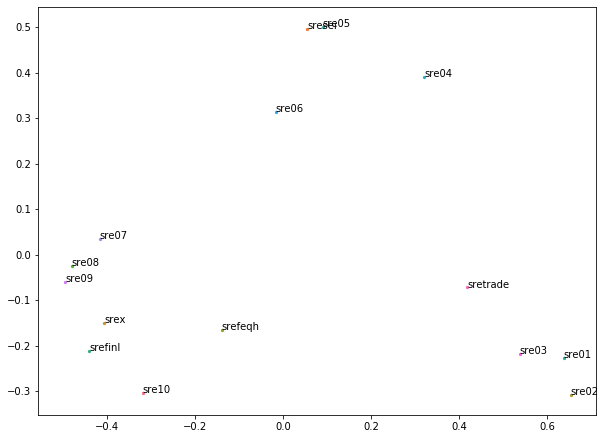

In [38]:
##############
# Plot Setup #
##############

print("Setting plot info")
# set the plot size
plt.figure(figsize=outputDimensions)

# find all the unique values for each of the label types
uniqueLabelValues = [set() for i in range(len(labelTypes))]

for labelList in labels:
    for i, label in enumerate(labelList):
        uniqueLabelValues[i].add(label)


# create color dictionaries for all labels
colorDictionaries = []
for uniqueLabels in uniqueLabelValues:
    colorpalette = sns.color_palette("husl",len(uniqueLabels)).as_hex()
    colorDictionaries.append(dict(zip(uniqueLabels,colorpalette)))
# Now we need the Unique Labels
uniqueColorLabels = list(uniqueLabelValues[colorValue])

# Let's get a number for each class
numberForClass = [i for i in range(len(uniqueColorLabels))]


# Make a dictionary! This is new sytax for us! It just makes a dictionary where
# the keys are the unique years and the values are found in numberForClass
labelForClassNumber = dict(zip(uniqueColorLabels,numberForClass))


# Let's make a new representation for each document that is just these integers
# and it needs to be a numpy array
textClass = np.array([labelForClassNumber[lab[colorValue]] for lab in labels])

# Make a list of the colors
colors = [colorDictionaries[colorValue][lab] for lab in uniqueColorLabels]

if hidePoints:
    pointSize = 0
###################
# Create the plot #
###################

print("Plotting texts")
for col, classNumber, lab in zip(colors, numberForClass, uniqueColorLabels):
    plt.scatter(myPCA[textClass==classNumber,0],myPCA[textClass==classNumber,1],label=lab,c=col, s=pointSize)


# Let's label individual points so we know WHICH document they are
if pointLabels:
    print("Adding Labels")
    for lab, datapoint in zip(labels, myPCA):
        plt.annotate(str(lab[labelValue]),xy=datapoint)


# 2d. A PCA scatterplot representing the vocabulary in your plot from 2C.

Setting plot info
Plotting texts
Adding Labels
[[-1.66400161e-01  4.57614024e-01 -5.43890329e-02  1.43617903e-02
  -1.78878991e-01  3.92883690e-02 -5.45808994e-02 -4.88077365e-02
  -3.20713978e-02 -6.03599431e-03 -1.36946901e-01  1.93977098e-02
   4.32175963e-03 -2.20993507e-01  1.83499634e-01 -3.93563601e-02
  -4.63539517e-02 -3.46965250e-02 -2.57702081e-02  1.15208220e-01
   5.83536233e-02  1.52165927e-01  5.08607684e-02 -1.16422953e-01
   2.57120885e-04 -2.06402060e-02 -3.91247886e-02  2.94339202e-02
  -2.68719762e-02 -5.47007265e-02 -8.78292482e-02 -1.10963349e-01
  -3.00629219e-02  1.51060821e-02 -5.89466337e-02  1.87961072e-01
   1.91116582e-01 -2.57947412e-03 -3.39937217e-02 -9.03018023e-02
   1.72517618e-03 -1.21390224e-01  3.79920590e-03 -9.42684133e-02
  -2.92572502e-01 -3.35431691e-02 -5.80495670e-02 -1.14970711e-01
  -3.48353095e-02 -4.79417428e-02  9.16538125e-02 -8.58512000e-02
   9.51797235e-02 -1.91363296e-02 -4.37749583e-02  5.65611300e-02
  -4.86617568e-03  1.21721968

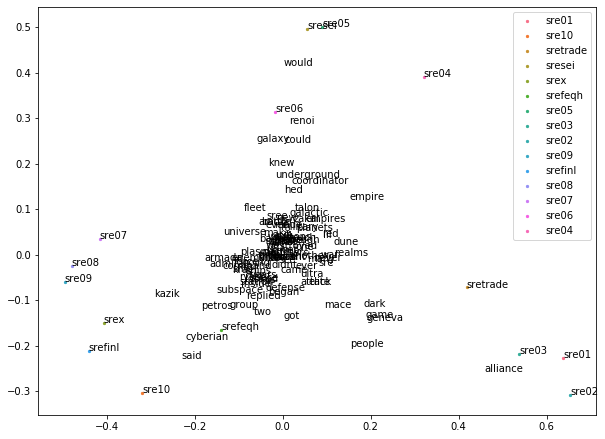

In [272]:
##############
# Plot Setup #
##############

print("Setting plot info")
# set the plot size
plt.figure(figsize=outputDimensions)

# find all the unique values for each of the label types
uniqueLabelValues = [set() for i in range(len(labelTypes))]

for labelList in labels:
    for i, label in enumerate(labelList):
        uniqueLabelValues[i].add(label)


# create color dictionaries for all labels
colorDictionaries = []
for uniqueLabels in uniqueLabelValues:
    colorpalette = sns.color_palette("husl",len(uniqueLabels)).as_hex()
    colorDictionaries.append(dict(zip(uniqueLabels,colorpalette)))
# Now we need the Unique Labels
uniqueColorLabels = list(uniqueLabelValues[colorValue])

# Let's get a number for each class
numberForClass = [i for i in range(len(uniqueColorLabels))]


# Make a dictionary! This is new sytax for us! It just makes a dictionary where
# the keys are the unique years and the values are found in numberForClass
labelForClassNumber = dict(zip(uniqueColorLabels,numberForClass))


# Let's make a new representation for each document that is just these integers
# and it needs to be a numpy array
textClass = np.array([labelForClassNumber[lab[colorValue]] for lab in labels])

# Make a list of the colors
colors = [colorDictionaries[colorValue][lab] for lab in uniqueColorLabels]

if hidePoints:
    pointSize = 0
###################
# Create the plot #
###################

print("Plotting texts")
for col, classNumber, lab in zip(colors, numberForClass, uniqueColorLabels):
    plt.scatter(myPCA[textClass==classNumber,0],myPCA[textClass==classNumber,1],label=lab,c=col, s=pointSize)


# Let's label individual points so we know WHICH document they are
if pointLabels:
    print("Adding Labels")
    for lab, datapoint in zip(labels, myPCA):
        plt.annotate(str(lab[labelValue]),xy=datapoint)


# Let's graph component loadings
vocabulary = countVectorizer.get_feature_names()


loadings = pca.components_
print(loadings)
if plotLoadings:
    print("Rendering Loadings")    
    for i, word in enumerate(vocabulary):
        plt.annotate(word, xy=(loadings[0, i], loadings[1,i]))

# Let's add a legend! matplotlib will make this for us based on the data we 
# gave the scatter function.
plt.legend()
plt.savefig(outputFile)



# 2 d In 3-5 sentences, comment on the PCA scatterplots, specifically whether or not you feel they accurately reflect similarities and dissimilarities among the parts of your corpus, and on the differences between the raw model and the model in 1C.

Answer I feel the PCA scatter plots accurately reflect the similarities and dissimilarities among the parts of my corpus. 
As the text gets preprocessed and cleaned of stop words, we can find the unique words some of the unique words in 
the corpus. However the distribution of the words amongst the principal component axis remains more or less the same.
This may be because the stop words are normally distributed across the corpus. the PCA is a dimensionality reduction technique,
and PCA clearly presents a better picture of the dataset.Visualization of a subset of the mnist dataset using the PCA.

We can note that the text is clustered around the center of the plot and there are outliers forming minor clusters along the diagonals
